# Greg

In [77]:
import numpy as np
import pandas as pd

import seaborn as sns

import sqlite3
from zipfile import ZipFile

## Box Office Mojo

In [72]:
box_office_mojo = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
box_office_mojo.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [73]:
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [74]:
box_office_mojo[box_office_mojo['foreign_gross'].isnull() == True]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [77]:
box_office_mojo = box_office_mojo.fillna(0)
box_office_mojo['domestic_gross']= box_office_mojo['domestic_gross'].astype(float)
box_office_mojo['foreign_gross'] = box_office_mojo['foreign_gross'].str.replace(",","").astype(float)
box_office_mojo['total_gross'] = box_office_mojo['domestic_gross'] + box_office_mojo['foreign_gross']

In [78]:
box_office_gross_mean = box_office_mojo['total_gross'].mean()
box_office_gross_med = box_office_mojo['total_gross'].median()
box_office_gross_std = box_office_mojo['total_gross'].std()

In [79]:
print(box_office_gross_mean)
box_office_gross_med

121200245.98011783


41500000.0

In [11]:
def z_score(value, mean, std):
    return (value - mean) / std

In [81]:
box_office_mojo['mod_z_score'] = box_office_mojo['total_gross'].apply(lambda x: mod_z_score(x, box_office_gross_mean, box_office_gross_std))

In [82]:
box_office_mojo[box_office_mojo['mod_z_score'] > 3]

,title,studio,domestic_gross,foreign_gross,year,total_gross,mod_z_score
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,4.580728
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,4.379734
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,4.063955
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,3.424648
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,3.058016
...,...,...,...,...,...,...,...
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09,4.972061
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08,3.789344
3085,Venom (2018),Sony,213500000.0,641500000.0,2018,8.550000e+08,3.553963
3086,Mission: Impossible - Fallout,Par.,220200000.0,571000000.0,2018,7.912000e+08,3.244965


## Rotten Tomatoes

In [12]:
rot_tomatoes_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rot_tomatoes_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [27]:
rot_tomatoes_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [48]:
rot_tomatoes_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', 
                                   encoding= 'unicode_escape')
rot_tomatoes_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [49]:
rot_tomatoes_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


## TMDB

In [10]:
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## The Numbers

In [31]:
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
the_numbers.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [33]:
def make_int(string):
    return int(string.replace("$","").replace(",",""))

In [34]:
the_numbers['production_budget'] = the_numbers['production_budget'].apply(lambda x: make_int(x))
the_numbers['domestic_gross'] = the_numbers['domestic_gross'].apply(lambda x: make_int(x))
the_numbers['worldwide_gross'] = the_numbers['worldwide_gross'].apply(lambda x: make_int(x))

In [35]:
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [39]:
the_numbers_mean = the_numbers['worldwide_gross'].mean()
the_numbers_med = the_numbers['worldwide_gross'].median()
the_numbers_std = the_numbers['worldwide_gross'].std()

print(the_numbers_mean)
print(the_numbers_med)

the_numbers['z_score'] = the_numbers['worldwide_gross'].apply(lambda x: z_score(x, the_numbers_mean, the_numbers_std))

91487460.90643376
27984448.5


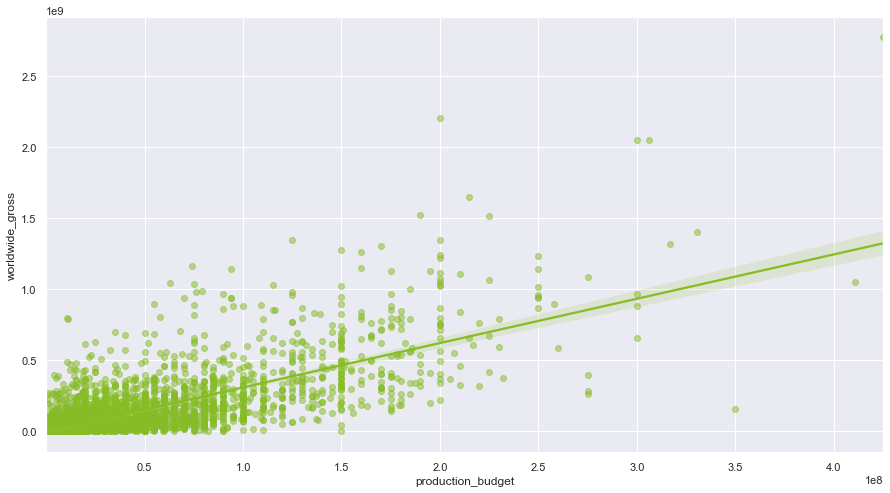

In [97]:
enmax_palette = ["#86BC25"]
sns.set_palette(palette=enmax_palette)

sns.regplot(data=the_numbers, x='production_budget', y='worldwide_gross', 
            scatter_kws={'alpha':0.5})
sns.set(rc={'figure.figsize':(15,8)})

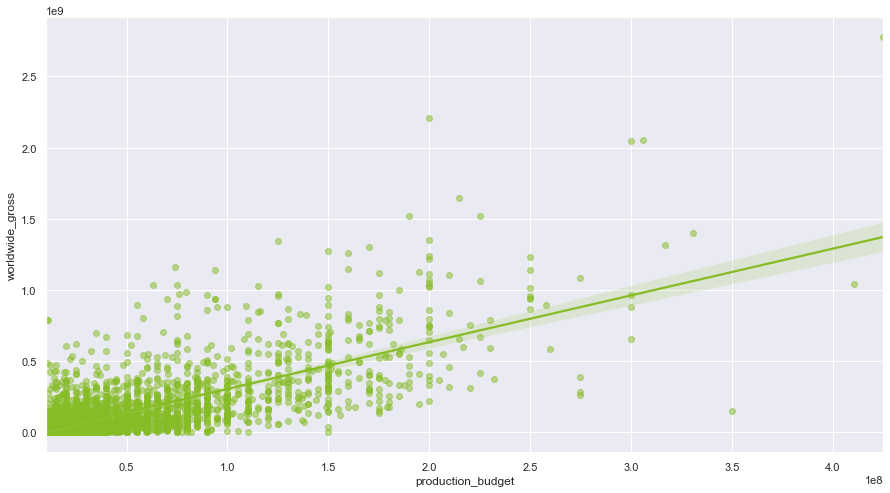

In [101]:
over_one_mil = the_numbers[the_numbers['production_budget'] > 10000000]
sns.set_palette(palette=enmax_palette)
sns.regplot(data=over_one_mil, x='production_budget', y='worldwide_gross', 
            scatter_kws={'alpha':0.5})
sns.set(rc={'figure.figsize':(15,8)})

In [40]:
the_numbers[the_numbers['movie'] == 'Avatar']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,z_score
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,15.366634


In [55]:
gross_outliers = the_numbers[the_numbers['z_score'] > 3]
outliers_movies_lst = list(gross_outliers['movie'].values)
outliers_movies_lst

['Avatar',
 'Pirates of the Caribbean: On Stranger Tides',
 'Avengers: Age of Ultron',
 'Star Wars Ep. VIII: The Last Jedi',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'Pirates of the Caribbean: At Worldâ\x80\x99s End',
 'Justice League',
 'Spectre',
 'The Dark Knight Rises',
 'Spider-Man 3',
 'Captain America: Civil War',
 'Batman v Superman: Dawn of Justice',
 'The Hobbit: An Unexpected Journey',
 'Harry Potter and the Half-Blood Prince',
 'The Hobbit: The Desolation of Smaug',
 'The Hobbit: The Battle of the Five Armies',
 'The Fate of the Furious',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'The Avengers',
 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest',
 'Man of Steel',
 'The Amazing Spider-Man',
 'Jurassic World',
 'Men in Black 3',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Black Panther',
 'Titanic',
 'Incredibles 2',
 'Rogue One: A Star Wars Story',
 'Finding Dory',
 'Toy Story 3',
 'Iron Man 3',
 'G

## SQL

In [47]:
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    #zip.printdir()
    zip.extractall()
conn = sqlite3.connect('./im.db')


In [ ]:
SELECT personid, primary_name, death_year, category 
FROM persons p
JOIN prinicipals 

In [59]:
imdb = pd.read_sql(f"""
SELECT pr.person_id, primary_name, death_year, category, primary_title,
       original_title
FROM persons p
LEFT JOIN principals pr ON pr.person_id = p.person_id
LEFT JOIN movie_basics mb ON pr.movie_id = mb.movie_id
""", conn)

In [75]:
imdb = imdb[imdb['death_year'].isnull() == True]
imdb_outliers = imdb[imdb['primary_title'].isin(outliers_movies_lst)]
display(imdb_outliers)
#grouped = imdb_outliers.groupby(['category','primary_name']).size().reset_index(name='counts')
grouped[grouped['counts'] > 1]

,person_id,primary_name,death_year,category,primary_title,original_title
480,nm0125336,Jez Butterworth,NaN,writer,Spectre,Spectre
2286,nm0671567,Michael Peña,NaN,actor,Ant-Man and the Wasp,Ant-Man and the Wasp
2797,nm0834902,Robert Stromberg,NaN,director,Maleficent,Maleficent
2799,nm0837112,Richard Suckle,NaN,producer,Suicide Squad,Suicide Squad
3273,nm1014201,Rhett Reese,NaN,writer,Deadpool,Deadpool
...,...,...,...,...,...,...
1005549,nm9989238,Suneet Gautam,NaN,composer,Titanic,Titanic
1009487,nm9989231,Mahesh Vashisht,NaN,composer,Titanic,Titanic
1013926,nm9039216,Neil Boultby,NaN,actor,Coco,Coco
1029087,nm9061881,Natalia Kaverznikova,NaN,actress,Coco,Coco


,category,primary_name,counts
5,actor,Andrew Garfield,2
8,actor,Andy Serkis,2
12,actor,Ben Affleck,2
19,actor,Benjamin Bratt,2
29,actor,Chiwetel Ejiofor,2
...,...,...,...
705,writer,Stephen McFeely,4
708,writer,Stuart Beattie,2
709,writer,Suzanne Collins,4
710,writer,Ted Elliott,3


In [ ]:
#Notes 

#Scatterplot Between Domestic Gross and Production Budget 
#Bar Plot of Most Occuring Actor 

#Hypothesis Testing 

# James

In [1]:
#Imports
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import string
import scipy.stats as stats

%matplotlib inline

In [2]:
#Read the data frame
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#Clean columns into floats into floats
tn_movie_budgets['production_budget'] = (
    tn_movie_budgets['production_budget'].map(
        lambda x : float(x.replace('$', '').replace(',', ''))))
tn_movie_budgets['domestic_gross'] = (
    tn_movie_budgets['domestic_gross'].map(
        lambda x : float(x.replace('$', '').replace(',', ''))))
tn_movie_budgets['worldwide_gross'] = (
    tn_movie_budgets['worldwide_gross'].map(
        lambda x : float(x.replace('$', '').replace(',', ''))))

#Creates a date time from release date
tn_movie_budgets['release_date']=(
    pd.to_datetime(tn_movie_budgets['release_date']))

#Creates a new title column
tn_movie_budgets['title']= (
    tn_movie_budgets['movie'].map(
        lambda x :''.join(filter(str.isalnum, x)).lower()))

tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,piratesofthecaribbeanonstrangertides
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,darkphoenix
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,avengersageofultron
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,starwarsepviiithelastjedi
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,red11
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,following
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,returntothelandofwonders
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,aplaguesopleasant


In [3]:

tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [4]:
#gets basic stats 
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
conn = sqlite3.connect('zippedData/im.db')

pd.read_sql('''
SELECT name FROM sqlite_master  
  WHERE type='table'
''', conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [6]:
q = '''
SELECT * FROM movie_basics
WHERE original_title LIKE '%frozen%'
;
'''

pd.read_sql(q, conn)

#movie basics has 150k rows, movie basics has 73k

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10047356,Eises Kälte - Frozen in Time,Eises Kälte - Frozen in Time,2018,92.0,Mystery
1,tt10059478,Frozen Faith: Cryonics and the Quest to Cheat ...,Frozen Faith: Cryonics and the Quest to Cheat ...,2016,NaN,Documentary
2,tt10178906,The Frozen Maze,The Frozen Maze,2018,95.0,"Mystery,Thriller"
3,tt10230504,Extraordinary People: Frozen From Dusk Till Dawn,Extraordinary People: Frozen From Dusk Till Dawn,2018,NaN,Documentary
4,tt10349550,Rapunzel: A Princess Frozen in Time,Rapunzel: A Princess Frozen in Time,2019,90.0,Fantasy
5,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport"
6,tt1719666,The 2010 Frozen Four Official Championship Film,The 2010 Frozen Four Official Championship Film,2010,69.0,Documentary
7,tt2005374,The Frozen Ground,The Frozen Ground,2013,105.0,"Crime,Drama,Mystery"
8,tt2197378,Frozen Time,Frozen Time,2011,109.0,Drama
9,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy"


<AxesSubplot:xlabel='production_budget', ylabel='domestic_gross'>

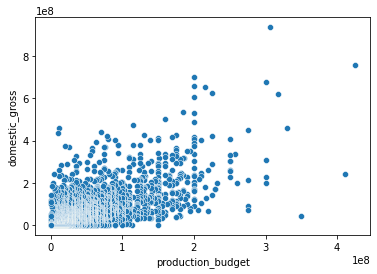

In [7]:
sns.scatterplot(x = tn_movie_budgets['production_budget'], 
                y = tn_movie_budgets['domestic_gross'])


In [8]:
tn_movie_budgets.corr()

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


## Genre Testing

In [9]:
#Create query 
q = '''
SELECT * 
FROM movie_basics
'''
#create a DF from the IMBD sql table
imdb_movie_ratings = pd.read_sql(q, conn)
#remove na's from the original title due to low numbers
imdb_movie_ratings.dropna(subset=['original_title'], inplace = True)
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  114401 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [10]:
#create a column for movie names to merge with other DFs   tn_movie_budgets
imdb_movie_ratings['title'] = (
    imdb_movie_ratings['original_title'].map(
        lambda x :''.join(filter(str.isalnum, x)).lower()))

#sets the index on the title field for the merge
tn_movie_budgets.set_index('title', inplace=True)
imdb_movie_ratings.set_index('title', inplace=True)
imdb_movie_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
title,,,,,,
sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
ashadkaekdin,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
theothersideofthewind,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
sabsebadasukh,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
latelenovelaerrante,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
#join new imdb with the numbers table
#tn_movie_budgets.set_index('title', inplace=True)

#combine imdb and the numbers tables
rating_and_budgets = tn_movie_budgets.join(imdb_movie_ratings, how = 'inner')
rating_and_budgets.reset_index(inplace=True)
rating_and_budgets = (
    rating_and_budgets.drop_duplicates(subset='title', keep="first"))
rating_and_budgets

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,10cloverfieldlane,54,2016-03-11,10 Cloverfield Lane,5000000.0,72082999.0,1.082864e+08,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
1,10daysinamadhouse,48,2015-11-11,10 Days in a Madhouse,12000000.0,14616.0,1.461600e+04,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
2,127hours,6,2010-11-05,127 Hours,18000000.0,18335230.0,6.021717e+07,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"
3,12rounds,37,2009-03-27,12 Rounds,20000000.0,12234694.0,1.730665e+07,tt3517850,12 Rounds,12 Rounds,2017,NaN,"Action,Drama,Romance"
4,12strong,64,2018-01-19,12 Strong,35000000.0,45819713.0,7.111838e+07,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,zookeeper,71,2011-07-08,Zookeeper,80000000.0,80360866.0,1.708055e+08,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
3764,zoolander2,64,2016-02-12,Zoolander 2,50000000.0,28848693.0,5.534869e+07,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
3765,zoom,26,2006-08-11,Zoom,35000000.0,11989328.0,1.250619e+07,tt3763866,Zoom,Zoom,2015,96.0,"Animation,Comedy,Drama"
3769,zootopia,57,2016-03-04,Zootopia,150000000.0,341268248.0,1.019430e+09,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"


In [12]:
rating_and_budgets['genres'] =  rating_and_budgets['genres'].str.split(',')
rating_and_budgets

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,10cloverfieldlane,54,2016-03-11,10 Cloverfield Lane,5000000.0,72082999.0,1.082864e+08,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]"
1,10daysinamadhouse,48,2015-11-11,10 Days in a Madhouse,12000000.0,14616.0,1.461600e+04,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama]
2,127hours,6,2010-11-05,127 Hours,18000000.0,18335230.0,6.021717e+07,tt1542344,127 Hours,127 Hours,2010,94.0,"[Adventure, Biography, Drama]"
3,12rounds,37,2009-03-27,12 Rounds,20000000.0,12234694.0,1.730665e+07,tt3517850,12 Rounds,12 Rounds,2017,NaN,"[Action, Drama, Romance]"
4,12strong,64,2018-01-19,12 Strong,35000000.0,45819713.0,7.111838e+07,tt1413492,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,zookeeper,71,2011-07-08,Zookeeper,80000000.0,80360866.0,1.708055e+08,tt1222817,Zookeeper,Zookeeper,2011,102.0,"[Comedy, Family, Romance]"
3764,zoolander2,64,2016-02-12,Zoolander 2,50000000.0,28848693.0,5.534869e+07,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,[Comedy]
3765,zoom,26,2006-08-11,Zoom,35000000.0,11989328.0,1.250619e+07,tt3763866,Zoom,Zoom,2015,96.0,"[Animation, Comedy, Drama]"
3769,zootopia,57,2016-03-04,Zootopia,150000000.0,341268248.0,1.019430e+09,tt2948356,Zootopia,Zootopia,2016,108.0,"[Adventure, Animation, Comedy]"


In [13]:
#create dummy collumns to get counts and easy splits
rating_and_budgets= (
    rating_and_budgets.drop('genres',1).join(
        rating_and_budgets.genres.str.join('|').str.get_dummies()))


In [14]:
#Gets the counts or all of the genre categories
counts = rating_and_budgets.iloc[:,14:42].sum()
#Highest counts - Drama, comedy
print(counts)

Animation       131
Biography       189
Comedy          680
Crime           310
Documentary     196
Drama          1144
Family          139
Fantasy         156
History          69
Horror          285
Music            70
Musical          20
Mystery         169
News              1
Romance         276
Sci-Fi          176
Sport            48
Thriller        392
War              37
Western          20
dtype: int64


In [15]:
#Lists for each individual statistics
#for genre in counts.index:
#    worldwide_gross_median.append(
#        rating_and_budgets[rating_and_budgets[genre] == 1]\
#            ['worldwide_gross'].median())

# Goes through each category and gets the statistic from it. 
# Then puts it in a dict with the counts

#Creates a new DF for processing
randb = rating_and_budgets.copy()
#median

worldwide_gross_median= [randb[randb[i] == 1]['worldwide_gross'].median() 
                         for i in counts.index]    
median_worldwide_gross = dict(zip(counts.index, worldwide_gross_median))

#mode
worldwide_gross_means = [randb[randb[i] == 1]['worldwide_gross'].mean() 
                         for i in counts.index]
mean_worldwide_gross = dict(zip(counts.index, worldwide_gross_means))

#count
worldwide_gross_counts = [randb[randb[i] == 1]['worldwide_gross'].count() 
                          for i in counts.index]
worldwide_gross_counts = dict(zip(counts.index, worldwide_gross_counts))

#max
worldwide_gross_max = [randb[randb[i] == 1]['worldwide_gross'].max() 
                       for i in counts.index]
worldwide_gross_max = dict(zip(counts.index, worldwide_gross_max))

#min
worldwide_gross_min = [randb[randb[i] == 1]['worldwide_gross'].min() 
                       for i in counts.index]
worldwide_gross_min = dict(zip(counts.index, worldwide_gross_min))

In [16]:
#sorts the values for data exploration
rating_and_budgets[rating_and_budgets['Music']==1].sort_values(
                                            'worldwide_gross',ascending=False)

,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
403,bohemianrhapsody,84,2018-11-02,Bohemian Rhapsody,55000000.0,216303339.0,894985342.0,tt1727824,Bohemian Rhapsody,Bohemian Rhapsody,...,1,0,0,0,0,0,0,0,0,0
248,astarisborn,5,2018-10-05,A Star is Born,36000000.0,215288866.0,433449571.0,tt1517451,A Star Is Born,A Star Is Born,...,1,0,0,0,1,0,0,0,0,0
1583,lalaland,92,2016-12-09,La La Land,20000000.0,151101803.0,426351163.0,tt3783958,La La Land,La La Land,...,1,0,0,0,0,0,0,0,0,0
2101,pitchperfect2,14,2015-05-15,Pitch Perfect 2,29000000.0,184296230.0,287625468.0,tt2848292,Pitch Perfect 2,Pitch Perfect 2,...,1,0,0,0,0,0,0,0,0,0
2102,pitchperfect3,58,2017-12-22,Pitch Perfect 3,45000000.0,104897530.0,185736412.0,tt4765284,Pitch Perfect 3,Pitch Perfect 3,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,alongtheroadside,91,2015-03-24,Along the Roadside,250000.0,0.0,3234.0,tt2290113,Along the Roadside,Along the Roadside,...,1,0,0,0,1,0,0,0,0,0
162,americanhero,3,2015-12-11,American Hero,1000000.0,0.0,26.0,tt2414176,American Hero,American Hero,...,1,0,0,0,0,0,0,0,0,0
3220,theresaisamother,40,2015-09-29,Theresa Is a Mother,200000.0,0.0,0.0,tt1989646,Theresa Is a Mother,Theresa Is a Mother,...,1,0,0,0,0,0,0,0,0,0
2548,steelspirit,58,2003-12-01,Steel Spirit,20000.0,0.0,0.0,tt4227178,Steel //Spirit,Steel //Spirit,...,1,0,0,0,0,0,0,0,0,0


In [17]:
#creates dataframe to highlight the stats
movie_stats = pd.DataFrame(
    zip(median_worldwide_gross.values(), 
        mean_worldwide_gross.values(), 
        worldwide_gross_counts.values(), 
        worldwide_gross_max.values(),
        worldwide_gross_min.values()),
    median_worldwide_gross.keys(),
        ['Medians','Means','Counts','Max','Min'])

In [18]:
#sorts the DF by median
movie_stats.sort_values('Medians', ascending=False)

,Medians,Means,Counts,Max,Min
Animation,197578586.0,3.006570e+08,131,1.242521e+09,0.0
Fantasy,84720721.5,2.078764e+08,156,1.259200e+09,0.0
Sci-Fi,79476525.5,2.553969e+08,176,2.048134e+09,0.0
News,57293371.0,5.729337e+07,1,5.729337e+07,57293371.0
Comedy,46055025.0,1.122968e+08,680,1.160336e+09,0.0
Family,42174545.0,1.401701e+08,139,1.259200e+09,0.0
Mystery,34246770.0,7.642743e+07,169,5.864643e+08,0.0
Musical,30128794.5,1.309215e+08,20,1.259200e+09,0.0
Crime,27552360.5,6.265413e+07,310,1.234846e+09,0.0
Thriller,25696249.5,8.100579e+07,392,1.234846e+09,0.0


C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='worldwide_gross', ylabel='Density'>

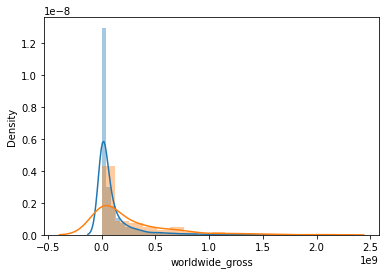

In [19]:
#plot the distribution of overall and the category
sns.distplot(rating_and_budgets['worldwide_gross'])
sns.distplot(
    rating_and_budgets[rating_and_budgets['Sci-Fi']==1]['worldwide_gross'])

In [20]:
#Creates two DFs, one with Sci-Fi and one without
animated_movies = rating_and_budgets[rating_and_budgets['Sci-Fi'] == 1]
not_animated_movies = rating_and_budgets[rating_and_budgets['Sci-Fi'] == 0]

In [21]:
#Runs a ttest
stats.ttest_ind(animated_movies['worldwide_gross'], 
                not_animated_movies['worldwide_gross'])

Ttest_indResult(statistic=10.570233558029575, pvalue=1.48717395752926e-25)

In [22]:
#Does the above tests for every genre
ttest_res = []
for genre in counts.index:
    genre_movie = rating_and_budgets[rating_and_budgets[genre] == 1]
    not_genre_movies = rating_and_budgets[rating_and_budgets[genre] == 0]
    ttest_res.append(stats.ttest_ind(genre_movie['worldwide_gross'], 
                                     not_genre_movies['worldwide_gross']))
    
ttest_res

#Warning happens due to th T-test being ran on news, which has 2 samples

C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


[Ttest_indResult(statistic=11.819691277138588, pvalue=2.2692702400680073e-31),
 Ttest_indResult(statistic=-2.7966397138567887, pvalue=0.005205041694229788),
 Ttest_indResult(statistic=1.047405756099582, pvalue=0.29501843255875276),
 Ttest_indResult(statistic=-4.057785417529457, pvalue=5.1131046465999955e-05),
 Ttest_indResult(statistic=-4.2692549623054825, pvalue=2.0378770368998445e-05),
 Ttest_indResult(statistic=-10.45618829039637, pvalue=4.725721936090204e-25),
 Ttest_indResult(statistic=2.1078758810063034, pvalue=0.0351456427411942),
 Ttest_indResult(statistic=6.674638667694225, pvalue=3.0707557723409656e-11),
 Ttest_indResult(statistic=-2.165103541533435, pvalue=0.030478460461883773),
 Ttest_indResult(statistic=-4.632481554676081, pvalue=3.8070833294726926e-06),
 Ttest_indResult(statistic=-1.8023058719111054, pvalue=0.07162329352077343),
 Ttest_indResult(statistic=0.5708557069525074, pvalue=0.5681511484345387),
 Ttest_indResult(statistic=-1.9623000829139412, pvalue=0.0498434741088

In [23]:
#Creates a DF for all the t-statistics and pvals
tscores = pd.DataFrame(dict(zip(counts.index, ttest_res)), 
                       ["Statistic", "Pvalue"]).T

In [24]:
#sorts the df by statistic
tscores.sort_values('Statistic')

,Statistic,Pvalue
Drama,-10.456188,4.725722e-25
Horror,-4.632482,3.807083e-06
Documentary,-4.269255,2.037877e-05
Romance,-4.233917,2.383419e-05
Crime,-4.057785,5.113105e-05
Biography,-2.796640,5.205042e-03
Thriller,-2.656510,7.947929e-03
History,-2.165104,3.047846e-02
Mystery,-1.962300,4.984347e-02
Music,-1.802306,7.162329e-02


In [25]:
#Plot average worldwide gross
#Plot production budget
#Graph top values

#len(counts.index)
rating_and_budgets['worldwide_gross'].median()

30063805.0

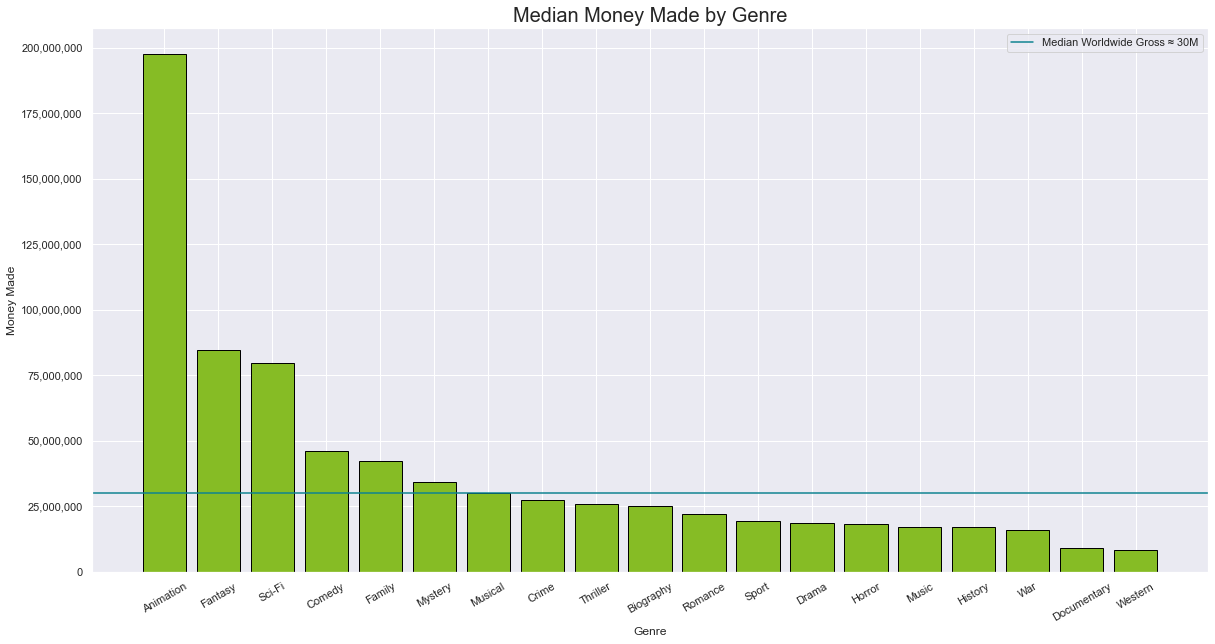

In [27]:
#Sets the theme to seaborn
sns.set_theme()

#Remove News as there is only 1 sample
cleaned_stats = movie_stats.drop(
    index='News').sort_values('Medians', ascending=False)

#Create figure
fig, ax = plt.subplots(figsize=(20,10))

#Create a bar plot for all of the medians for each genre
ax.bar(range(0,len(cleaned_stats['Medians'])), 
       list(cleaned_stats['Medians']), color = '#86BC25',edgecolor = "black")

#Creates the xticks
ax.set_xticks(range(0,len(cleaned_stats['Medians'])))
ax.set_xticklabels(list(cleaned_stats.index.values), rotation = 30)

#Sets the tables and the titles
ax.set_xlabel('Genre')
ax.set_ylabel('Money Made')
ax.set_title('Median Money Made by Genre', fontsize=20)
#Cleans up the formatting of
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plot median income line
plt.axhline(y = rating_and_budgets['worldwide_gross'].median(), 
            color = '#0D8390', linestyle = '-', 
            label = 'Median Worldwide Gross ≈ 30M')
#Shows the legend
ax.legend()

plt.show()

# Han

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline
import regex as re
from zipfile import ZipFile
import seaborn as sns

In [2]:
movieinfoDF = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

In [3]:
movieinfoDF

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [4]:
tmdbMoviesDF = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [5]:
tmdbMoviesDF.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
movieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [7]:
movieBudgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [8]:
movieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
bomgrossDF = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [10]:
bomgrossDF.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [11]:
rot_tomatoes_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t',
                                   encoding= 'unicode_escape')

In [12]:
rot_tomatoes_reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [13]:
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    #zip.printdir()
    zip.extractall()

In [14]:
conn = sqlite3.connect('./im.db')

In [15]:
pd.read_sql('''
SELECT *
FROM movie_basics;
''',conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [16]:
pd.read_sql('''
SELECT *
FROM movie_ratings;
''',conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [17]:
pd.read_sql("""SELECT movie_id, averagerating
                FROM movie_ratings;
                """,conn)

,movie_id,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


In [18]:
#joining the move basics and ratings tables
joinedtables = pd.read_sql("""SELECT movie_basics.movie_id, movie_ratings.averagerating, movie_basics.genres, movie_basics.primary_title
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id=movie_ratings.movie_id
ORDER BY averagerating DESC;
""", conn)

In [19]:
joinedtables

,movie_id,averagerating,genres,primary_title
0,tt10176328,10.0,Documentary,Exteriores: Mulheres Brasileiras na Diplomacia
1,tt10378660,10.0,"Comedy,Drama",The Dark Knight: The Ballad of the N Word
2,tt1770682,10.0,"Crime,Documentary",Freeing Bernie Baran
3,tt2632430,10.0,Documentary,Hercule contre Hermès
4,tt4109192,10.0,Documentary,I Was Born Yesterday!
...,...,...,...,...
73851,tt8446392,1.0,Drama,La Scelta Impossibile
73852,tt8654080,1.0,Horror,Overdose of Gore: Crime born Crime
73853,tt9005484,1.0,Drama,Roofied: The Lethal Dose
73854,tt9352262,1.0,Drama,The Defender


In [20]:
#top 10
top10 = joinedtables.head(10)

In [21]:
#bottom 10
bot10 = joinedtables.tail(10)

In [22]:
#show top 10 rated movies
top10

,movie_id,averagerating,genres,primary_title
0,tt10176328,10.0,Documentary,Exteriores: Mulheres Brasileiras na Diplomacia
1,tt10378660,10.0,"Comedy,Drama",The Dark Knight: The Ballad of the N Word
2,tt1770682,10.0,"Crime,Documentary",Freeing Bernie Baran
3,tt2632430,10.0,Documentary,Hercule contre Hermès
4,tt4109192,10.0,Documentary,I Was Born Yesterday!
5,tt4944240,10.0,Drama,Dog Days in the Heartland
6,tt4960818,10.0,Documentary,Revolution Food
7,tt5089804,10.0,Documentary,Fly High: Story of the Disc Dog
8,tt5344358,10.0,Documentary,All Around Us
9,tt5390098,10.0,Documentary,The Paternal Bond: Barbary Macaques


In [23]:
#show bottom 10 rated movies
bot10

,movie_id,averagerating,genres,primary_title
73846,tt7923374,1.0,"Comedy,Fantasy",Badang
73847,tt7926296,1.0,Drama,Nakhodka interneta
73848,tt8176282,1.0,Documentary,Des figues en avril
73849,tt8313262,1.0,Drama,Glaza i mir. Chast 1
73850,tt8426154,1.0,Animation,Pup Scouts
73851,tt8446392,1.0,Drama,La Scelta Impossibile
73852,tt8654080,1.0,Horror,Overdose of Gore: Crime born Crime
73853,tt9005484,1.0,Drama,Roofied: The Lethal Dose
73854,tt9352262,1.0,Drama,The Defender
73855,tt9378134,1.0,"Comedy,Drama",Startup Girls


In [24]:
#drop null values from the table
clean_table = joinedtables.dropna()

In [25]:
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
def z_score(value, mean, std):
    return (value - mean) / std

In [27]:
def make_int(string):
    return int(string.replace("$","").replace(",",""))

In [28]:
the_numbers['production_budget'] = the_numbers['production_budget'].apply(lambda x: make_int(x))
the_numbers['domestic_gross'] = the_numbers['domestic_gross'].apply(lambda x: make_int(x))
the_numbers['worldwide_gross'] = the_numbers['worldwide_gross'].apply(lambda x: make_int(x))

In [29]:
the_numbers_mean = the_numbers['worldwide_gross'].mean()
the_numbers_med = the_numbers['worldwide_gross'].median()
the_numbers_std = the_numbers['worldwide_gross'].std()

print(the_numbers_mean)
print(the_numbers_med)

the_numbers['z_score'] = the_numbers['worldwide_gross'].apply(lambda x: z_score(x, the_numbers_mean, the_numbers_std))

91487460.90643376
27984448.5


In [30]:
gross_outliers = the_numbers[the_numbers['z_score'] > 3]
outliers_movies_lst = list(gross_outliers['movie'].values)
outliers_movies_lst

['Avatar',
 'Pirates of the Caribbean: On Stranger Tides',
 'Avengers: Age of Ultron',
 'Star Wars Ep. VIII: The Last Jedi',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'Pirates of the Caribbean: At Worldâ\x80\x99s End',
 'Justice League',
 'Spectre',
 'The Dark Knight Rises',
 'Spider-Man 3',
 'Captain America: Civil War',
 'Batman v Superman: Dawn of Justice',
 'The Hobbit: An Unexpected Journey',
 'Harry Potter and the Half-Blood Prince',
 'The Hobbit: The Desolation of Smaug',
 'The Hobbit: The Battle of the Five Armies',
 'The Fate of the Furious',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'The Avengers',
 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest',
 'Man of Steel',
 'The Amazing Spider-Man',
 'Jurassic World',
 'Men in Black 3',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Black Panther',
 'Titanic',
 'Incredibles 2',
 'Rogue One: A Star Wars Story',
 'Finding Dory',
 'Toy Story 3',
 'Iron Man 3',
 'G

In [31]:
imdb = pd.read_sql(f"""
SELECT pr.person_id, primary_name, death_year, category, primary_title,
       original_title
FROM persons p
LEFT JOIN principals pr ON pr.person_id = p.person_id
LEFT JOIN movie_basics mb ON pr.movie_id = mb.movie_id
""", conn)

In [32]:
imdb = imdb[imdb['death_year'].isnull() == True]
imdb_outliers = imdb[imdb['primary_title'].isin(outliers_movies_lst)]
display(imdb_outliers)
grouped = imdb_outliers.groupby(['category','primary_name']).size().reset_index(name='counts')
grouped2 = grouped[grouped['counts'] > 2]

,person_id,primary_name,death_year,category,primary_title,original_title
480,nm0125336,Jez Butterworth,NaN,writer,Spectre,Spectre
2286,nm0671567,Michael Peña,NaN,actor,Ant-Man and the Wasp,Ant-Man and the Wasp
2797,nm0834902,Robert Stromberg,NaN,director,Maleficent,Maleficent
2799,nm0837112,Richard Suckle,NaN,producer,Suicide Squad,Suicide Squad
3273,nm1014201,Rhett Reese,NaN,writer,Deadpool,Deadpool
...,...,...,...,...,...,...
1005549,nm9989238,Suneet Gautam,NaN,composer,Titanic,Titanic
1009487,nm9989231,Mahesh Vashisht,NaN,composer,Titanic,Titanic
1013926,nm9039216,Neil Boultby,NaN,actor,Coco,Coco
1029087,nm9061881,Natalia Kaverznikova,NaN,actress,Coco,Coco


In [33]:
#show table of actors that appear more than 2 times.
grouped2

,category,primary_name,counts
30,actor,Chris Evans,5
31,actor,Chris Hemsworth,4
33,actor,Chris Pratt,3
49,actor,Dwayne Johnson,5
74,actor,Ian McKellen,4
99,actor,Johnny Depp,4
106,actor,Josh Hutcherson,4
119,actor,Liam Hemsworth,4
124,actor,Mark Ruffalo,3
126,actor,Martin Freeman,3


In [65]:
#creates a df that shows actors appearances more than 3 times.
grouped3 = grouped[grouped['counts'] > 3]

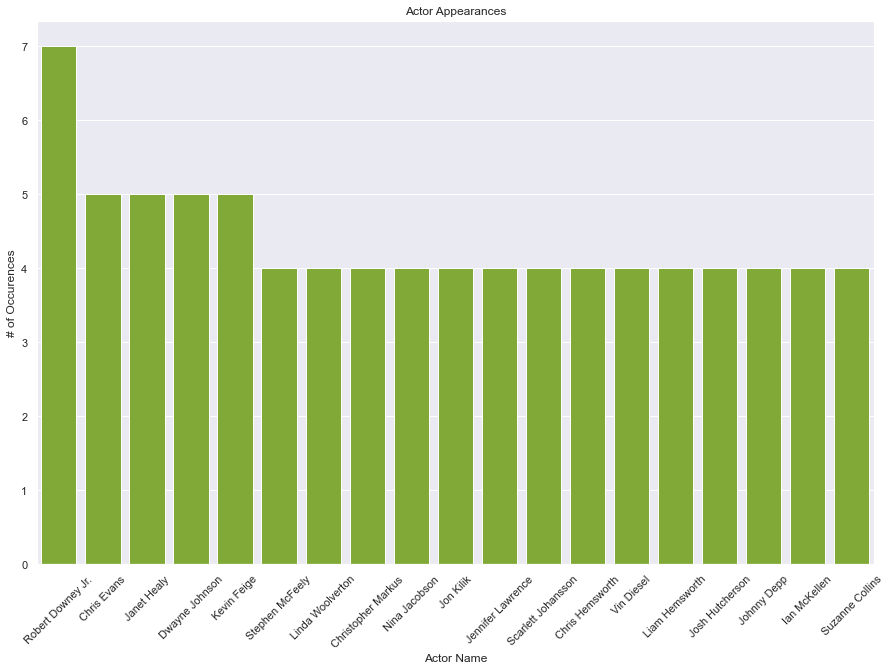

In [72]:
#plot actors that occur 4 or more times.
ax = sns.barplot(x="primary_name", y="counts", data=grouped3, color="#86BC25", order=grouped3.sort_values('counts', ascending=False).primary_name)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Actor Appearances")
ax.set_xlabel("Actor Name")
ax.set_ylabel("# of Occurences")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

plt.show()

# Rachel

# Himasri

#### Analysis 
1. ROI per genre 
2. Popularity per genre
3. Avg worldwide gross per genre
4. Buget -> worldwide gross
5. Best runtime for movie 
6. Best month to release the mvoie

#### Variables to explore
1. Revenue = worldwide gross
2. Profit = Revenue - Budget

In [2]:
import pandas as pd

In [3]:
tmdb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col = 0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
tn_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col = 0)
tn_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [5]:
rtmovies_df = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rtmovies_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [6]:
rtreviews_df = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding= 'unicode_escape' )
rtreviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [7]:
import sqlite3
import pandas as pd
import regex as re
from zipfile import ZipFile

In [8]:
#conn = sqlite3.connect('zippedData/im.db')

In [9]:
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    #zip.printdir()
    zip.extractall()
    

In [10]:
conn = sqlite3.connect('./im.db')
#cur = conn.cursor()

In [11]:
# Table names
pd.read_sql('''
SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';
''',conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [12]:
q = """ SELECT * FROM movie_basics """
movie_basics_df = pd.read_sql(q,conn)

In [13]:
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [14]:
q = """ SELECT * FROM directors """
directors_df = pd.read_sql(q,conn)

In [15]:
directors_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [16]:
q = """ SELECT * FROM known_for """
known_for_df = pd.read_sql(q,conn)
known_for_df

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [17]:
q = """ SELECT * FROM persons """
persons_df = pd.read_sql(q,conn)
persons_df

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [18]:
q = """ SELECT * FROM principals """
principals_df = pd.read_sql(q,conn)
principals_df

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [19]:
q = """ SELECT * FROM writers """
writers_df = pd.read_sql(q,conn)
writers_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [20]:
q = """ SELECT * FROM movie_ratings """
movie_ratings_df = pd.read_sql(q,conn)

In [21]:
movie_ratings_df 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [22]:
q = """ SELECT * FROM movie_akas """
movie_akas_df = pd.read_sql(q,conn)

In [23]:
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [24]:
# Join movie_basics and movie ratings tables
joined_df = movie_ratings_df.merge(movie_basics_df, how="inner", on="movie_id")

In [25]:
#Shape of the dataset
joined_df.shape

(73856, 8)

In [26]:
# Check for Duplicate values
joined_df.duplicated().sum()

0

In [27]:
#Check for null values
joined_df.isnull().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

##### There are missing values in runtime_minutes and genres column

In [28]:
# Drop rows with null values 
joined_df.dropna(subset = ["runtime_minutes", "genres"], inplace=True)

In [29]:
joined_df.isnull().sum()

movie_id           0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [30]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   averagerating    65720 non-null  float64
 2   numvotes         65720 non-null  int64  
 3   primary_title    65720 non-null  object 
 4   original_title   65720 non-null  object 
 5   start_year       65720 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           65720 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [31]:
movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz", index_col = 0)
movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


##### Foriegn gross - Object data type.
##### There are unnecessary characters in Foriegn Gross Column

In [33]:
# Remove the unnecessary characters using a regular expression
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].replace('[$,()]', '', regex = True)

#Convert object to Float data type
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)

In [34]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 132.3+ KB


In [35]:
#Check for missing values
movie_gross_df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [36]:
#Check for duplicate values
movie_gross_df.duplicated().sum()

11

In [37]:
movie_gross_df.dropna(inplace=True)

In [38]:
movie_gross_df.isna().sum()

studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [39]:
#tn_df["year"] = tn_df["release_date"].map(lambda x: int(x[-4:]))

In [40]:
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [41]:
#map(lambda x :''.join(filter(str.isalnum, x)).lower())

In [42]:
#tn_df["month"] = tn_df["release_date"].map(lambda x: x[:3])
#tn_df.head()

In [43]:
def make_int(string):
    return int(string.replace("$","").replace(",",""))

In [44]:
tn_df['production_budget'] = tn_df['production_budget'].apply(lambda x: make_int(x))
tn_df['domestic_gross'] = tn_df['domestic_gross'].apply(lambda x: make_int(x))
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].apply(lambda x: make_int(x))

In [45]:
#Convert to datetime object using datetime function
tn_df["release_date"] = pd.to_datetime(tn_df["release_date"], format = '%b %d, %Y')

In [46]:
#Create a column called days 
tn_df['days'] = tn_df["release_date"].dt.day_name()

In [47]:
#Create a column called months 
tn_df['months'] = tn_df["release_date"].dt.month_name()


In [48]:
tn_df['year'] = tn_df["release_date"].dt.year

In [49]:
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year
id,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,Friday,December,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Friday,May,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Friday,June,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Friday,May,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Friday,December,2017


In [50]:
tn_df['ROI'] = (tn_df['worldwide_gross'] - tn_df['production_budget']) / tn_df['production_budget']
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,ROI
id,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,Friday,December,2009,5.532577
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Friday,May,2011,1.546673
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Friday,June,2019,-0.572108
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Friday,May,2015,3.243841
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Friday,December,2017,3.153696


In [51]:
#Filtering the dataset with movies released from the year 2000
tn_df = tn_df[tn_df['year'] >= 2000]

In [52]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387 entries, 1 to 82
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4387 non-null   datetime64[ns]
 1   movie              4387 non-null   object        
 2   production_budget  4387 non-null   int64         
 3   domestic_gross     4387 non-null   int64         
 4   worldwide_gross    4387 non-null   int64         
 5   days               4387 non-null   object        
 6   months             4387 non-null   object        
 7   year               4387 non-null   int64         
 8   ROI                4387 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 342.7+ KB


Text(0.5, 1.0, 'ROI of movies released in each month')

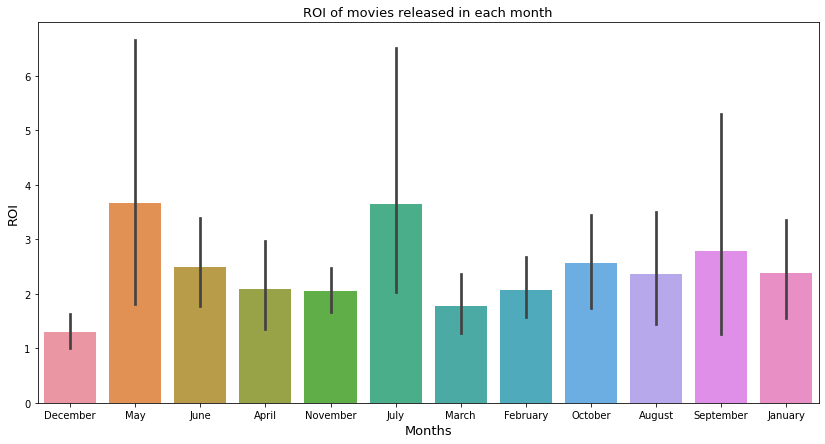

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

fig,ax = plt.subplots(figsize=(14,7))
sns.barplot(data = tn_df, x='months', y='ROI')
ax.set_ylabel('ROI', fontsize=13)
ax.set_xlabel('Months', fontsize=13)
ax.set_title('ROI of movies released in each month', fontsize=13)

##### Need to sort the months in order for the x-axis 

In [54]:
#Create a dictionary 
months_dict = { 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

#Map the dictionary to the 'month' column 
tn_df['months_numeric'] = tn_df['months'].apply(lambda x: months_dict.get(x))

#Sort the numeric months column in the ascending order
tn_df = tn_df.sort_values('months_numeric')

C:\Users\hmorareddy\AppData\Local\Temp\ipykernel_19956\368310665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_df['months_numeric'] = tn_df['months'].apply(lambda x: months_dict.get(x))


In [55]:
tn_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,ROI,months_numeric
id,,,,,,,,,,
87,2008-01-11,The Pirates Who Don't Do Anything: A VeggieTal...,15000000,12981269,13248444,Friday,January,2008,-0.116770,1
92,2015-01-27,Born of War,5000000,0,0,Tuesday,January,2015,-1.000000,1
88,2007-01-30,Farce of the Penguins,5000000,0,0,Tuesday,January,2007,-1.000000,1
91,2017-01-06,Underworld: Blood Wars,35000000,30353973,81209222,Friday,January,2017,1.320263,1
94,2008-01-25,Untraceable,35000000,28687835,52649951,Friday,January,2008,0.504284,1
...,...,...,...,...,...,...,...,...,...,...
68,2006-12-31,Les BronzÃ©s 3: amis pour la vie,42000000,0,83833602,Sunday,December,2006,0.996038,12
65,2010-12-03,The Warrior's Way,42000000,5666340,8514325,Friday,December,2010,-0.797278,12
58,2018-12-25,Holmes & Watson,42000000,30568743,41926605,Tuesday,December,2018,-0.001747,12


In [56]:
tn_df['profit'] = (tn_df['worldwide_gross'] - tn_df['production_budget'])
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,ROI,months_numeric,profit
id,,,,,,,,,,,
87,2008-01-11,The Pirates Who Don't Do Anything: A VeggieTal...,15000000,12981269,13248444,Friday,January,2008,-0.116770,1,-1751556
92,2015-01-27,Born of War,5000000,0,0,Tuesday,January,2015,-1.000000,1,-5000000
88,2007-01-30,Farce of the Penguins,5000000,0,0,Tuesday,January,2007,-1.000000,1,-5000000
91,2017-01-06,Underworld: Blood Wars,35000000,30353973,81209222,Friday,January,2017,1.320263,1,46209222
94,2008-01-25,Untraceable,35000000,28687835,52649951,Friday,January,2008,0.504284,1,17649951


In [57]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387 entries, 87 to 1
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4387 non-null   datetime64[ns]
 1   movie              4387 non-null   object        
 2   production_budget  4387 non-null   int64         
 3   domestic_gross     4387 non-null   int64         
 4   worldwide_gross    4387 non-null   int64         
 5   days               4387 non-null   object        
 6   months             4387 non-null   object        
 7   year               4387 non-null   int64         
 8   ROI                4387 non-null   float64       
 9   months_numeric     4387 non-null   int64         
 10  profit             4387 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 411.3+ KB


Text(0.5, 1.0, 'Monthly profit of movies (2000-2020) ')

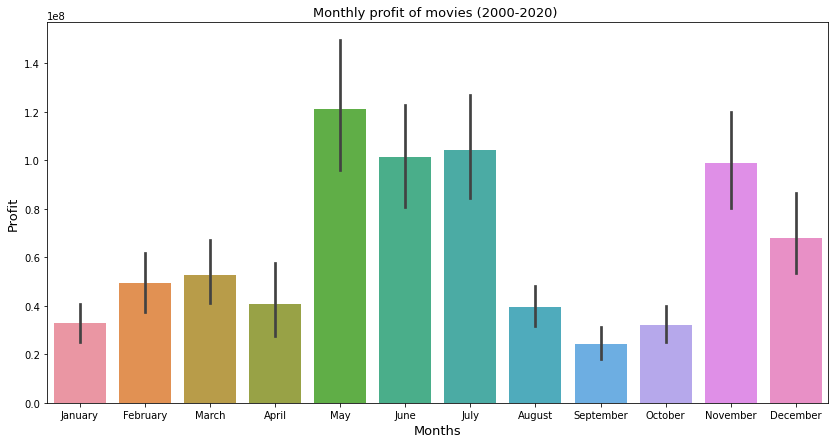

In [58]:
fig,ax = plt.subplots(figsize=(14,7))
sns.barplot(data = tn_df, x='months', y='profit')
ax.set_ylabel('Profit', fontsize=13)
ax.set_xlabel('Months', fontsize=13)
ax.set_title('Monthly profit of movies (2000-2020) ', fontsize=13)

Text(0.5, 1.0, 'Monthly Worldwide Gross earnings of movies (2000-2020) ')

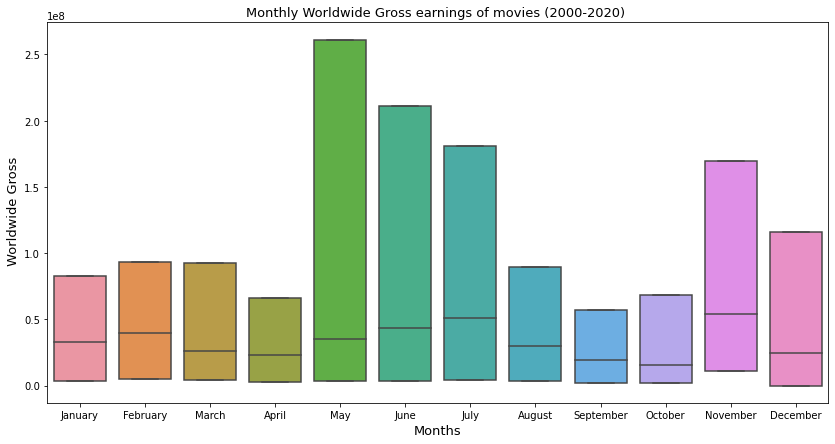

In [59]:
fig,ax = plt.subplots(figsize=(14,7))
sns.boxplot(data = tn_df, x='months', y='worldwide_gross',showfliers=0, whis=0 )
ax.set_ylabel(' Worldwide Gross', fontsize=13)
ax.set_xlabel('Months', fontsize=13)
ax.set_title('Monthly Worldwide Gross earnings of movies (2000-2020) ', fontsize=13)

In [60]:
#Create function for season

def season(s):
    return s.map(lambda x: "Winter" if x > 11 or x<3
                 else ("Spring" if x>=3 and x<6
                       else("Summer" if x>5 and x<9
                            else("Fall"))))

tn_df["season"] = season(tn_df["months_numeric"])

In [61]:
tn_df["season"].value_counts()

Fall      1187
Winter    1133
Spring    1045
Summer    1022
Name: season, dtype: int64

Text(0.5, 1.0, 'Seasonal Worldwide Gross earnings of movies (2000-2020) ')

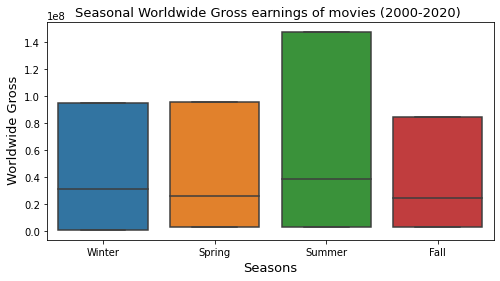

In [62]:
fig,ax = plt.subplots(figsize=(8,4))
sns.boxplot(data = tn_df, x='season', y='worldwide_gross',showfliers=0, whis=0 )
ax.set_ylabel(' Worldwide Gross', fontsize=13)
ax.set_xlabel('Seasons', fontsize=13)
ax.set_title('Seasonal Worldwide Gross earnings of movies (2000-2020) ', fontsize=13)

In [63]:
#Analysis of Gross earnings of movies and season over the last 2 decades
season_gross = (tn_df.groupby(["year","season"])['worldwide_gross'].mean()).sort_values(ascending = False)
season_gross.head()

year  season
2018  Summer    2.126597e+08
2017  Spring    2.032295e+08
      Summer    2.009847e+08
2018  Spring    1.951302e+08
2016  Summer    1.782752e+08
Name: worldwide_gross, dtype: float64

In [65]:
#season_profit = (tn_df.groupby(["year","season"])['profit'].mean()).sort_values(ascending = False)


In [66]:
#plt.figure(figsize=(15,8))
#ax = sns.stripplot(x=tn_df.year , y=tn_df.profit, data=tn_df)
#ax.set_title("Profit vs Release Year", fontsize=17)
#ax.set_ylabel('Profit', fontsize=13)
#ax.set_xlabel('Release year', fontsize=13)

In [67]:
#Creates a new title column
tn_df["title"]= tn_df["movie"].map(lambda x :''.join(filter(str.isalnum, x)).lower())
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,ROI,months_numeric,profit,season,title
id,,,,,,,,,,,,,
87,2008-01-11,The Pirates Who Don't Do Anything: A VeggieTal...,15000000,12981269,13248444,Friday,January,2008,-0.116770,1,-1751556,Winter,thepirateswhodontdoanythingaveggietalesmovie
92,2015-01-27,Born of War,5000000,0,0,Tuesday,January,2015,-1.000000,1,-5000000,Winter,bornofwar
88,2007-01-30,Farce of the Penguins,5000000,0,0,Tuesday,January,2007,-1.000000,1,-5000000,Winter,farceofthepenguins
91,2017-01-06,Underworld: Blood Wars,35000000,30353973,81209222,Friday,January,2017,1.320263,1,46209222,Winter,underworldbloodwars
94,2008-01-25,Untraceable,35000000,28687835,52649951,Friday,January,2008,0.504284,1,17649951,Winter,untraceable


In [68]:
#Create query 
q = """
SELECT * 
FROM movie_basics
"""
#create a DF from the IMBD sql table
imdb_movie_ratings = pd.read_sql(q, conn)
#remove na's from the original title due to low numbers
imdb_movie_ratings.dropna(subset=['original_title'], inplace = True)
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  114401 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [69]:
#create a column for movie names to merge with other DFs   tn_movie_budgets
imdb_movie_ratings['title'] = imdb_movie_ratings['original_title'].map(lambda x :''.join(filter(str.isalnum, x)).lower())

#sets the index on the title field for the merge
tn_df.set_index('title', inplace=True)
imdb_movie_ratings.set_index('title', inplace=True)
imdb_movie_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
title,,,,,,
sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
ashadkaekdin,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
theothersideofthewind,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
sabsebadasukh,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
latelenovelaerrante,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [70]:
#combine imdb and the numbers tables
rating_and_budgets = tn_df.join(imdb_movie_ratings, how = 'inner')
rating_and_budgets.reset_index(inplace=True)
rating_and_budgets = rating_and_budgets.drop_duplicates(subset='title', keep="first")
rating_and_budgets

,title,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,ROI,months_numeric,profit,season,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,10cloverfieldlane,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,Friday,March,2016,20.657284,3,103286422,Spring,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
1,10daysinamadhouse,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,Wednesday,November,2015,-0.998782,11,-11985384,Fall,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
2,127hours,2010-11-05,127 Hours,18000000,18335230,60217171,Friday,November,2010,2.345398,11,42217171,Fall,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"
3,12rounds,2009-03-27,12 Rounds,20000000,12234694,17306648,Friday,March,2009,-0.134668,3,-2693352,Spring,tt3517850,12 Rounds,12 Rounds,2017,NaN,"Action,Drama,Romance"
4,12strong,2018-01-19,12 Strong,35000000,45819713,71118378,Friday,January,2018,1.031954,1,36118378,Winter,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,zookeeper,2011-07-08,Zookeeper,80000000,80360866,170805525,Friday,July,2011,1.135069,7,90805525,Summer,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance"
3311,zoolander2,2016-02-12,Zoolander 2,50000000,28848693,55348693,Friday,February,2016,0.106974,2,5348693,Winter,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy
3312,zoom,2006-08-11,Zoom,35000000,11989328,12506188,Friday,August,2006,-0.642680,8,-22493812,Summer,tt3763866,Zoom,Zoom,2015,96.0,"Animation,Comedy,Drama"
3316,zootopia,2016-03-04,Zootopia,150000000,341268248,1019429616,Friday,March,2016,5.796197,3,869429616,Spring,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy"


In [71]:
# Explode the genres
# Convert values into string and split them
rating_and_budgets['genres'] = rating_and_budgets['genres'].str.split(",")
# Convert values into list of strings
rating_and_budgets['genres'] = rating_and_budgets['genres'].tolist()
# Explode list into individual values
rating_and_budgets = rating_and_budgets.explode('genres')
rating_and_budgets.head()

,title,release_date,movie,production_budget,domestic_gross,worldwide_gross,days,months,year,ROI,months_numeric,profit,season,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,10cloverfieldlane,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,Friday,March,2016,20.657284,3,103286422,Spring,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,Drama
0,10cloverfieldlane,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,Friday,March,2016,20.657284,3,103286422,Spring,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,Horror
0,10cloverfieldlane,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,Friday,March,2016,20.657284,3,103286422,Spring,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,Mystery
1,10daysinamadhouse,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,Wednesday,November,2015,-0.998782,11,-11985384,Fall,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
2,127hours,2010-11-05,127 Hours,18000000,18335230,60217171,Friday,November,2010,2.345398,11,42217171,Fall,tt1542344,127 Hours,127 Hours,2010,94.0,Adventure


In [72]:
sorted_df = rating_and_budgets.sort_values(by=['months_numeric'])

Text(0, 0.5, 'Average Gross')

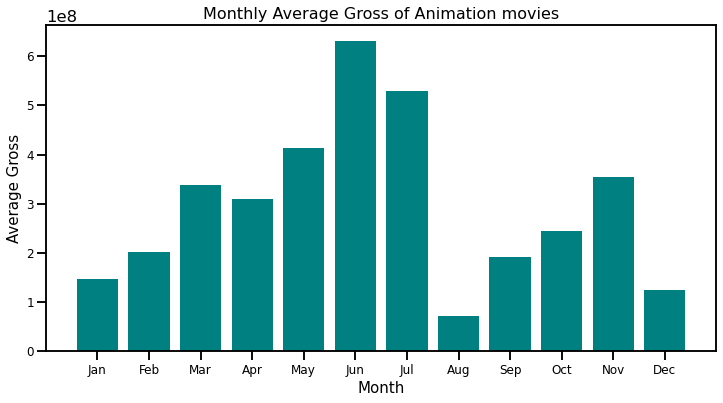

In [96]:
animated_df=sorted_df[sorted_df['genres']=='Animation']
animated_df = animated_df.drop_duplicates('title')
animated_df = animated_df.groupby(['months_numeric']).worldwide_gross.mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# Get x and y data
x1 = animated_df.index
y1 = animated_df.values

ax.bar(x1, y1, color='#0D8390')

months =['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_num = range(1,13)
ax.set_xticks(months_num)
ax.set_xticklabels(months)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Monthly Average Gross of Animation movies', fontsize=14)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Average Gross', fontsize=15)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Text(0, 0.5, 'Average Gross')

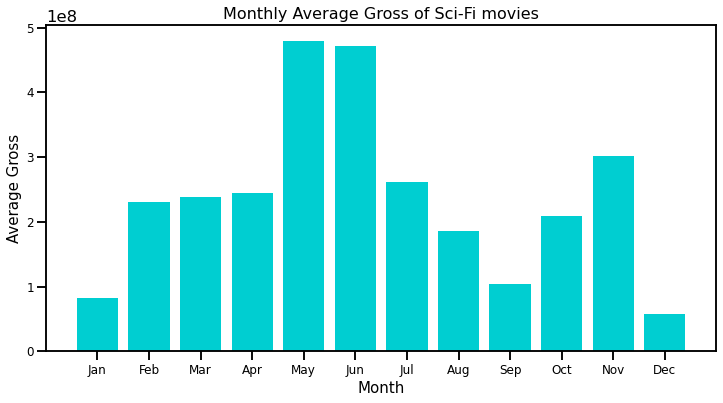

In [95]:
sci_df=sorted_df[sorted_df['genres']=='Sci-Fi']
sci_df = sci_df.drop_duplicates('title')
sci_df = sci_df.groupby(['months_numeric']).worldwide_gross.mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# Get x and y data
x1 = sci_df.index
y1 = sci_df.values

ax.bar(x1, y1, color='#046A38')

months =['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_num = range(1,13)
ax.set_xticks(months_num)
ax.set_xticklabels(months)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Monthly Average Gross of Sci-Fi movies', fontsize=14)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Average Gross', fontsize=15)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Text(0, 0.5, 'Average Gross')

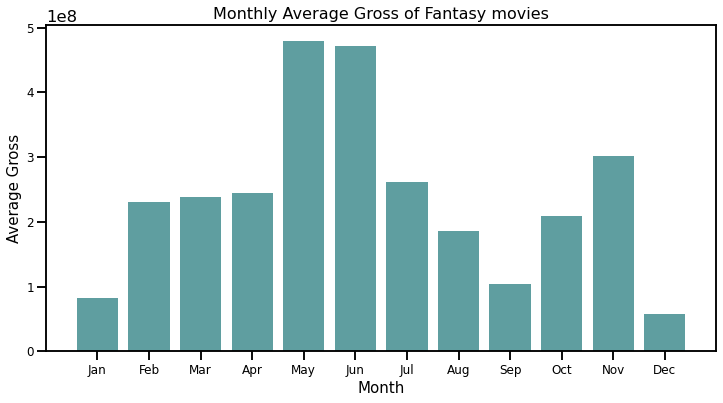

In [94]:
import matplotlib
sns.set_theme()

fantasy_df=sorted_df[sorted_df['genres']=='Fantasy']
fantasy_df = fantasy_df.drop_duplicates('title')
fantasy_df = fantasy_df.groupby(['months_numeric']).worldwide_gross.mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# Get x and y data
x1 = fantasy_df.index
y1 = fantasy_df.values

ax.bar(x1, y1, color='#86BC25')

months =['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_num = range(1,13)
ax.set_xticks(months_num)
ax.set_xticklabels(months)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Monthly Average Gross of Fantasy movies', fontsize=14)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Average Gross', fontsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))